<a href="https://colab.research.google.com/github/tontan2545/Emotion-Recognition/blob/main/emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nonthapatkaewamporn","key":"13da06eacc309d0e25a7f502cd53814b"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge
!mkdir train
!unzip train.csv.zip -d train
!mkdir test
!unzip test.csv.zip -d test
!mkdir icml_face_data
!unzip icml_face_data.csv.zip -d icml_face_data

100% 77.0M/77.3M [00:02<00:00, 18.3MB/s]
100% 77.3M/77.3M [00:02<00:00, 29.3MB/s]
 99% 96.0M/96.6M [00:09<00:00, 10.1MB/s]
100% 96.6M/96.6M [00:09<00:00, 10.6MB/s]
 96% 88.0M/92.0M [00:02<00:00, 32.5MB/s]
100% 92.0M/92.0M [00:02<00:00, 34.1MB/s]
 62% 12.0M/19.3M [00:02<00:01, 5.16MB/s]
100% 19.3M/19.3M [00:02<00:00, 7.88MB/s]
  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 7.63MB/s]
Archive:  train.csv.zip
  inflating: train/train.csv         
Archive:  test.csv.zip
  inflating: test/test.csv           
Archive:  icml_face_data.csv.zip
  inflating: icml_face_data/icml_face_data.csv  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns 
from keras.preprocessing.image import ImageDataGenerator as Imgen
from tensorflow.keras.utils import to_categorical

In [4]:
vdat = pd.read_csv('./test/test.csv')
vdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pixels  7178 non-null   object
dtypes: object(1)
memory usage: 56.2+ KB


In [5]:
pdat = pd.read_csv('./icml_face_data/icml_face_data.csv')
pdat.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [6]:
tdat = pd.read_csv('./train/train.csv')
tdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1   pixels   28709 non-null  object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [7]:
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

# Preprocessing

Train Data

In [8]:
val_data = pdat[pdat[" Usage"]=="PublicTest"]
val_data.head()

,emotion,Usage,pixels
28709,0,PublicTest,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,PublicTest,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,PublicTest,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,PublicTest,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,PublicTest,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [9]:
val_Y = to_categorical(val_data["emotion"].to_numpy(),7)
string_x = val_data[" pixels"].to_numpy()

In [10]:
val_x = []
def get_training_data():
  for x in string_x:
    nump_x = np.array(x.split()).astype(np.int)
    resized_x = np.reshape(nump_x, (48,48,1))
    val_x.append(resized_x)
get_training_data()
val_x = np.array(val_x)
print(val_x.shape)

(3589, 48, 48, 1)


Public Data

In [11]:
dat = tdat.copy()
dat.drop_duplicates(inplace=True)
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27515 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  27515 non-null  int64 
 1   pixels   27515 non-null  object
dtypes: int64(1), object(1)
memory usage: 644.9+ KB


In [12]:
train_Y = to_categorical(dat['emotion'].to_numpy(),7)
string_x = dat['pixels'].to_numpy()

In [13]:
train_x = []
def get_training_data():
  for x in string_x:
    nump_x = np.array(x.split()).astype(np.int)
    resized_x = np.reshape(nump_x, (48,48,1))
    train_x.append(resized_x)
get_training_data()
train_x = np.array(train_x)
print(train_x.shape)

(27515, 48, 48, 1)


Test Data

In [14]:
dat = pdat[pdat[" Usage"]=="PrivateTest"]

In [15]:
test_Y = to_categorical(dat['emotion'].to_numpy(),7)
string_x = dat[' pixels'].to_numpy()

In [16]:
test_x = []
def get_training_data():
  for x in string_x:
    nump_x = np.array(x.split()).astype(np.int)
    resized_x = np.reshape(nump_x, (48,48,1))
    test_x.append(resized_x)
get_training_data()
test_x = np.array(test_x)
print(test_x.shape)

(3589, 48, 48, 1)


In [17]:
def plotImages(x,y):
    plt.figure(figsize=[20,12])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x[i, :, :, 0],cmap="gray")
        plt.title(emotions[y[i]])
        plt.axis("off")
    plt.show()

Visualization

In [27]:
trainGen = Imgen(rescale=1./255,
                 )
valGen = Imgen(rescale=1./255,
               )
testGen = Imgen(rescale=1./255)

In [19]:
trainds = trainGen.flow(train_x,train_Y,
                   batch_size = 32
                   )

valds = valGen.flow(val_x,val_Y,
               batch_size = 32
               )

testds = testGen.flow(test_x,test_Y,
                      batch_size=32,
                      shuffle=False)

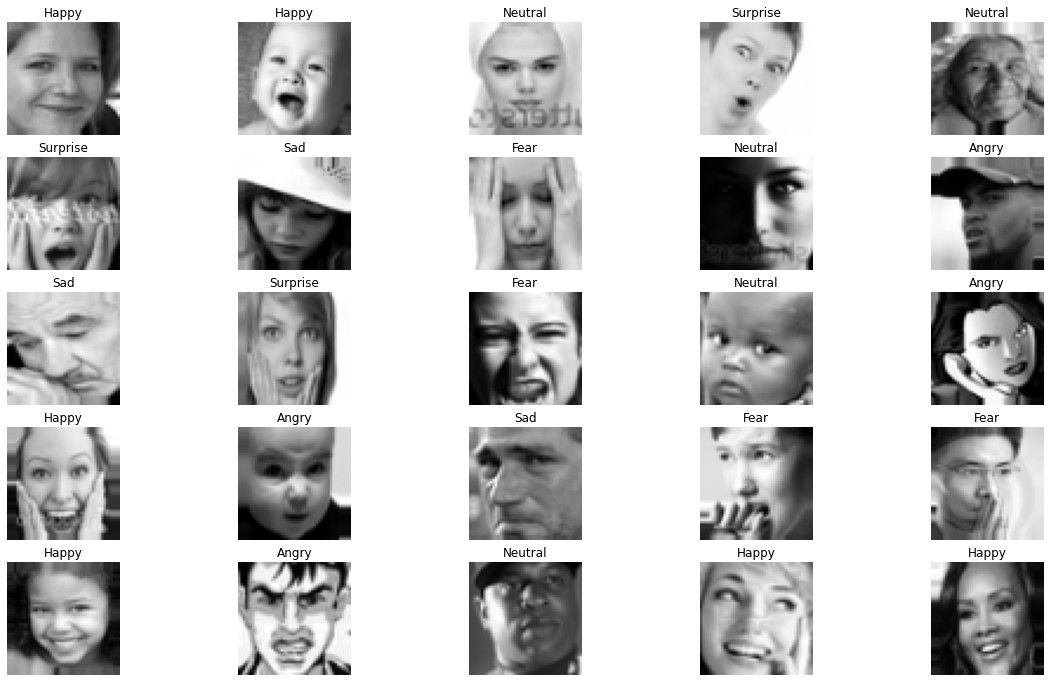

In [ ]:
#this line does not work, i want die
x,y = next(trainds)
plotImages(x,y)

# Deeplearning Model

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [28]:
no_of_classes = 7
model = Sequential([
                    Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)),
                    BatchNormalization(),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),

                    Conv2D(128,(3,3),padding = 'same'),
                    BatchNormalization(),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),

                    Conv2D(256,(3,3),padding = 'same'),
                    BatchNormalization(),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),

                    Conv2D(512,(3,3),padding = 'same'),
                    BatchNormalization(),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),

                    Conv2D(512,(3,3),padding = 'same'),
                    BatchNormalization(),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    
                    Flatten(),

                    Dense(256),
                    BatchNormalization(),
                    Activation('relu'),
                    Dropout(0.25),

                    Dense(512),
                    BatchNormalization(),
                    Activation('relu'),
                    Dropout(0.25),

                    Dense(no_of_classes, activation="softmax")
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="categorical_entropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_13 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_13 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 128)      

In [29]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['acc'])

In [31]:
history = model.fit(trainds, epochs=epochs, callbacks=callbacks_list, validation_data=valds)

Epoch 1/48
860/860 [==============================] - 32s 37ms/step - loss: 1.2129 - acc: 0.5404 - val_loss: 1.1381 - val_acc: 0.5589

Epoch 00001: val_acc improved from 0.52215 to 0.55893, saving model to ./model.h5
Epoch 2/48
860/860 [==============================] - 32s 37ms/step - loss: 1.1812 - acc: 0.5516 - val_loss: 1.1347 - val_acc: 0.5581

Epoch 00002: val_acc did not improve from 0.55893
Epoch 3/48
860/860 [==============================] - 32s 37ms/step - loss: 1.1599 - acc: 0.5598 - val_loss: 1.1121 - val_acc: 0.5795

Epoch 00003: val_acc improved from 0.55893 to 0.57955, saving model to ./model.h5
Epoch 4/48
860/860 [==============================] - 32s 37ms/step - loss: 1.1460 - acc: 0.5652 - val_loss: 1.1611 - val_acc: 0.5548

Epoch 00004: val_acc did not improve from 0.57955
Epoch 5/48
860/860 [==============================] - 32s 37ms/step - loss: 1.1297 - acc: 0.5730 - val_loss: 1.0850 - val_acc: 0.5829

Epoch 00005: val_acc improved from 0.57955 to 0.58289, saving